# DATA PREPROCESSING USING THE EMPLOYEE DATASET.
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score

# 1. Load the data into the pandas environment and identify some basic details of the
dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [17]:
df=pd.read_csv('employee.csv')
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [5]:
df.shape

(9, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [35]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2. Reset the index as "name" as the index.


In [18]:
df.set_index(['name'], inplace=True)

In [19]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3) Select rows for specific names Jack Morgan and Josh wills

In [20]:
df.loc[['Jack Morgan','Josh Wills'],:]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4) Select data for multiple values "Sales" and “Finance”.

In [21]:
df[df['department'].isin(['Sales', 'Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5) Display employee who has more than 700 performance score.

In [22]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6) Display employee who has more than 500 and less than 700 performance score

In [31]:
df[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7)Check and handle missing values in the dataset.

In [30]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

# handling missing value in gender

In [36]:
df["gender"].fillna("Nill", inplace = True) 

In [37]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,Nill,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,Nill,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# handling missing value in age and income with median

In [43]:
for i in ['age','income']:
    df[i]=df[i].fillna(df[i].median())
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [44]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,Nill,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Nill,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# handling missing value in age and income with mean

In [45]:
for i in ['age','income']:
    df[i]=df[i].fillna(df[i].mean())
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [46]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,Nill,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Nill,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 8) Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'box plot of performance score')

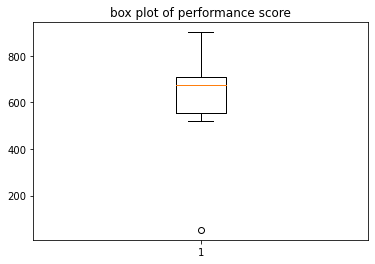

In [47]:
plt.boxplot(df['performance_score'])
plt.title('box plot of performance score')

In [48]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)



Q1= 556.0
Q2= 674.0
Q3= 711.0


In [54]:
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
upp_lim=Q3+1.5*IQR
print(low_lim)
print(upp_lim)

323.5
943.5


In [55]:
outlier=[]
for x in df['performance_score']:
    if((x>upp_lim) or (x<low_lim)):
        outlier.append(x)
outlier
    

[53]

In [59]:
ind1=df['performance_score']<low_lim
df.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [61]:
df.drop(['James Authur'],inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,Nill,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,Nill,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


outlier is removed.

Text(0.5, 1.0, 'box plot of performance score')

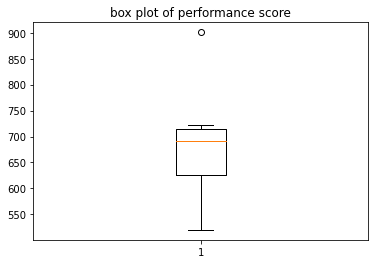

In [62]:
plt.boxplot(df['performance_score'])
plt.title('box plot of performance score')

# 8)Check the gender column and do Dummy encoding.


In [64]:
df1 = pd.get_dummies(df['gender'])
df1

,F,M,Nill
name,,,
Allen Smith,0,0,1
S Kumar,1,0,0
Jack Morgan,0,1,0
Ying Chin,1,0,0
Dheeraj Patel,1,0,0
Satyam Sharma,0,0,1
Josh Wills,1,0,0
Leo Duck,0,1,0


In [66]:
df2=pd.concat([df,df1],axis='columns')
df2

,age,income,gender,department,grade,performance_score,F,M,Nill
name,,,,,,,,,
Allen Smith,45.0,52000.0,Nill,Operations,G3,723,0,0,1
S Kumar,45.0,16000.0,F,Finance,G0,520,1,0,0
Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1,0
Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0,0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0,0
Satyam Sharma,45.0,62000.0,Nill,Sales,G3,649,0,0,1
Josh Wills,54.0,52000.0,F,Finance,G3,901,1,0,0
Leo Duck,23.0,98000.0,M,Sales,G4,709,0,1,0


# 10)Do the standard scaling on the feature performance score

In [67]:
df.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [75]:
x=df.drop(['age', 'income', 'gender','department', 'grade'], axis=1)


In [77]:
x.describe()

,performance_score
count,8.00000
mean,680.37500
std,116.16729
min,520.00000
25%,625.75000
50%,691.50000
75%,714.00000
max,901.00000


In [76]:
type(x)

pandas.core.frame.DataFrame

In [71]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x=pd.DataFrame(x)
x.describe()



,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00


after standard scaling, standard deviation equal to 1.